In [3]:
from konlpy.tag import Okt
t = Okt()


In [17]:

sentence = ''' 절망의 반대가 희망은 아니다.
어두운 밤하늘에 별이 빛나듯
희망은 절망 속에 싹트는 거지
만약에 우리가 희망함이 적다면
그 누가 세상을 비추어줄까.
정희성, 희망 공부'''

print('형태소:', t.morphs(sentence))
print()
print('명사:', t.nouns(sentence))
print()
print('품사 태깅 결과:', t.pos(sentence))


형태소: ['절망', '의', '반대', '가', '희망', '은', '아니다', '.', '\n', '어', '두운', '밤하늘', '에', '별', '이', '빛나듯', '\n', '희망', '은', '절망', '속', '에', '싹트는', '거지', '\n', '만약', '에', '우리', '가', '희망', '함', '이', '적다면', '\n', '그', '누가', '세상', '을', '비추어줄까', '.', '\n', '정희성', ',', '희망', '공부']

명사: ['절망', '반대', '희망', '어', '두운', '밤하늘', '별', '희망', '절망', '속', '거지', '만약', '우리', '희망', '함', '그', '누가', '세상', '정희성', '희망', '공부']

품사 태깅 결과: [('절망', 'Noun'), ('의', 'Josa'), ('반대', 'Noun'), ('가', 'Josa'), ('희망', 'Noun'), ('은', 'Josa'), ('아니다', 'Adjective'), ('.', 'Punctuation'), ('\n', 'Foreign'), ('어', 'Noun'), ('두운', 'Noun'), ('밤하늘', 'Noun'), ('에', 'Josa'), ('별', 'Noun'), ('이', 'Josa'), ('빛나듯', 'Verb'), ('\n', 'Foreign'), ('희망', 'Noun'), ('은', 'Josa'), ('절망', 'Noun'), ('속', 'Noun'), ('에', 'Josa'), ('싹트는', 'Verb'), ('거지', 'Noun'), ('\n', 'Foreign'), ('만약', 'Noun'), ('에', 'Josa'), ('우리', 'Noun'), ('가', 'Josa'), ('희망', 'Noun'), ('함', 'Noun'), ('이', 'Josa'), ('적다면', 'Verb'), ('\n', 'Foreign'), ('그', 'Noun'), ('누가', 'Noun'), ('세상

In [1]:
import pandas as pd
df = pd.read_csv('./data/daum_movie_review.csv')
df.head(5)

,review,rating,date,title
0,돈 들인건 티가 나지만 보는 내내 하품만,1,2018.10.29,인피니티 워
1,몰입할수밖에 없다. 어렵게 생각할 필요없다. 내가 전투에 참여한듯 손에 땀이남.,10,2018.10.26,인피니티 워
2,이전 작품에 비해 더 화려하고 스케일도 커졌지만.... 전국 맛집의 음식들을 한데 ...,8,2018.10.24,인피니티 워
3,이 정도면 볼만하다고 할 수 있음!,8,2018.10.22,인피니티 워
4,재미있다,10,2018.10.20,인피니티 워


In [3]:
df.title.value_counts()

title
신과함께      4947
택시운전사     2322
인피니티 워    2042
범죄도시      1939
곤지암       1547
라라랜드      1150
코코         778
Name: count, dtype: int64

In [15]:
df.review

0                                   돈 들인건 티가 나지만 보는 내내 하품만
1             몰입할수밖에 없다. 어렵게 생각할 필요없다. 내가 전투에 참여한듯 손에 땀이남.
2        이전 작품에 비해 더 화려하고 스케일도 커졌지만.... 전국 맛집의 음식들을 한데 ...
3                                      이 정도면 볼만하다고 할 수 있음!
4                                                     재미있다
                               ...                        
14720    어른들을 위한 동화    정말 오랜만에  좋은 애니를 보았습니다     가족의 소중...
14721                                     디즈니는 못해도 본전은 한다.
14722                              가족을 위한 영화... 괜찮은 영화.~~~
14723        간만에 제대로 잘짜여진 각본의 영화를 봤네 여운이 아직도 남아~어른을 위한 애니~
14724                     한국개봉을 눈빠지게 기다린 보람이있다 깨우치는게 많은 영화
Name: review, Length: 14725, dtype: object

In [5]:
from sklearn.model_selection import train_test_split

# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(df.review, df.title, random_state=0)
# 비율을 지정하지 않으면 75:25로 분할됨
print('#Train set size:', len(X_train)) # 실제로 몇개의 특성이 사용되었는지 확인
print('#Test set size:', len(X_test))

#Train set size: 11043
#Test set size: 3682


In [39]:
from konlpy.tag import Okt #konlpy에서 Twitter 형태소 분석기를 import
#from konlpy.tag import Twitter #konlpy에서 Twitter 형태소 분석기를 import
okt = Okt()

print(okt.morphs(X_train[1])) #둘째 리뷰에 대해 형태소 단위로 tokenize
print()
print(okt.nouns(X_train[1])) #둘째 리뷰에서 명사만 추출
print()
print(okt.pos(X_train[1])) #둘째 리뷰에서 품사 추출

['몰입', '할수밖에', '없다', '.', '어렵게', '생각', '할', '필요없다', '.', '내', '가', '전투', '에', '참여', '한', '듯', '손', '에', '땀', '이남', '.']

['몰입', '생각', '내', '전투', '참여', '듯', '손', '땀', '이남']

[('몰입', 'Noun'), ('할수밖에', 'Verb'), ('없다', 'Adjective'), ('.', 'Punctuation'), ('어렵게', 'Adjective'), ('생각', 'Noun'), ('할', 'Verb'), ('필요없다', 'Adjective'), ('.', 'Punctuation'), ('내', 'Noun'), ('가', 'Josa'), ('전투', 'Noun'), ('에', 'Josa'), ('참여', 'Noun'), ('한', 'Determiner'), ('듯', 'Noun'), ('손', 'Noun'), ('에', 'Josa'), ('땀', 'Noun'), ('이남', 'Noun'), ('.', 'Punctuation')]


In [10]:
print('실제영화제목, 예측한 제목, 리뷰')
for content in zip(y_test[:10], clf.predict(X_test_tfidf[:10]), X_test[:10]):
    print(content)

실제영화제목, 예측한 제목, 리뷰
('범죄도시', '신과함께', '오랜만에 잼나는 영화 봤습니다.  다음에 더 재미있는 영화 기대하겠습니다.')
('범죄도시', '범죄도시', '조연들이 눈에 박힌다. 간만에 집중 ㅎ')
('코코', '코코', '대감동을 선사. 인사이드 아웃을 잇는 픽사의 감동스토리. 신과함께의 멕시코판이라고나할까요??')
('신과함께', '신과함께', '돈이 안아까웠던 영화ᆞᆞ  정말 좋았다')
('신과함께', '신과함께', '역시 김용화감독이 영화는 잘 만들어요. 이제 VFX 제작 부문도 헐리우드 수준 이상입니다.')
('택시운전사', '택시운전사', '민주화를 위해 힘써주신 분들께 감사하는 마음으로 살아야겠다.')
('신과함께', '신과함께', '잠만 자다 왔음')
('신과함께', '신과함께', '오랜만에 잼있고 좋은 영화를 봤다')
('범죄도시', '신과함께', '잼남')
('범죄도시', '인피니티 워', '대박~~')


In [41]:
import pandas as pd
df = pd.read_csv('./data/daum_movie_review.csv')
df.head(5)

,review,rating,date,title
0,돈 들인건 티가 나지만 보는 내내 하품만,1,2018.10.29,인피니티 워
1,몰입할수밖에 없다. 어렵게 생각할 필요없다. 내가 전투에 참여한듯 손에 땀이남.,10,2018.10.26,인피니티 워
2,이전 작품에 비해 더 화려하고 스케일도 커졌지만.... 전국 맛집의 음식들을 한데 ...,8,2018.10.24,인피니티 워
3,이 정도면 볼만하다고 할 수 있음!,8,2018.10.22,인피니티 워
4,재미있다,10,2018.10.20,인피니티 워


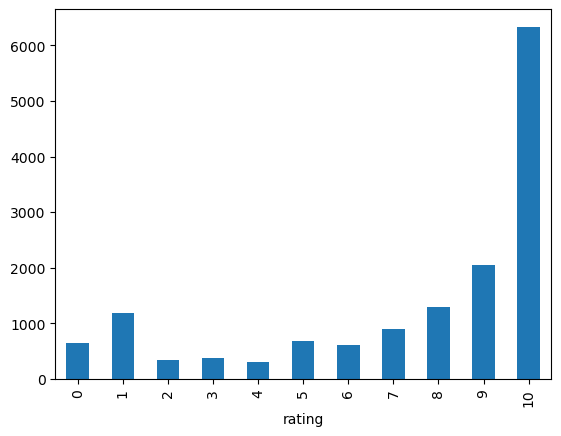

In [45]:
import matplotlib.pyplot as plt

df.rating.value_counts().sort_index().plot(kind='bar')
#df.rating.plot.hist(bins=10) #히스토그램을 그릴 수도 있다.
plt.show()

In [49]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()  #객체를 생성
lr.fit(X_train_tfidf, y_train)
print('#Regression Train set R2 score: {:.3f}'.format(lr.score(X_train_tfidf, y_train)))
print('#Regression Test set R2 score: {:.3f}'.format(lr.score(X_test_tfidf, y_test)))

#Regression Train set R2 score: 0.169
#Regression Test set R2 score: -0.202


In [53]:
y_train_senti = (y_train > 5)
y_test_senti = (y_test > 5)

y_train_predict = (lr.predict(X_train_tfidf) > 5)
y_test_predict = (lr.predict(X_test_tfidf) > 5)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('#Accuracy for train set: {:.3f}'.format(accuracy_score(y_train_senti, y_train_predict)))
print('#Precision for train set: {:.3f}'.format(precision_score(y_train_senti, y_train_predict)))
print('#Recall for train set: {:.3f}'.format(recall_score(y_train_senti, y_train_predict)))
print('#F1 for train set: {:.3f}'.format(f1_score(y_train_senti, y_train_predict)))

print('#Accuracy for test set: {:.3f}'.format(accuracy_score(y_test_senti, y_test_predict)))
print('#Precision for test set: {:.3f}'.format(precision_score(y_test_senti, y_test_predict)))
print('#Recall for test set: {:.3f}'.format(recall_score(y_test_senti, y_test_predict)))
print('#F1 for test set: {:.3f}'.format(f1_score(y_test_senti, y_test_predict)))

#Accuracy for train set: 0.777
#Precision for train set: 0.780
#Recall for train set: 0.982
#F1 for train set: 0.870
#Accuracy for test set: 0.732
#Precision for test set: 0.764
#Recall for test set: 0.940
#F1 for test set: 0.843


In [55]:
from sklearn.linear_model import LogisticRegression #sklearn이 제공하는 logistic regression을 사용

#count vector에 대해 regression을 해서 NB와 비교
LR_clf = LogisticRegression() #분류기 선언
LR_clf.fit(X_train_tfidf, y_train_senti) # train data를 이용하여 분류기를 학습

y_train_predict = LR_clf.predict(X_train_tfidf)
y_test_predict = LR_clf.predict(X_test_tfidf)

print('#Accuracy for train set: {:.3f}'.format(accuracy_score(y_train_senti, y_train_predict)))
print('#Precision for train set: {:.3f}'.format(precision_score(y_train_senti, y_train_predict)))
print('#Recall for train set: {:.3f}'.format(recall_score(y_train_senti, y_train_predict)))
print('#F1 for train set: {:.3f}'.format(f1_score(y_train_senti, y_train_predict)))

print('#Accuracy for test set: {:.3f}'.format(accuracy_score(y_test_senti, y_test_predict)))
print('#Precision for test set: {:.3f}'.format(precision_score(y_test_senti, y_test_predict)))
print('#Recall for test set: {:.3f}'.format(recall_score(y_test_senti, y_test_predict)))
print('#F1 for test set: {:.3f}'.format(f1_score(y_test_senti, y_test_predict)))

#Accuracy for train set: 0.761
#Precision for train set: 0.760
#Recall for train set: 1.000
#F1 for train set: 0.864
#Accuracy for test set: 0.762
#Precision for test set: 0.764
#Recall for test set: 0.997
#F1 for test set: 0.865
